<a href="https://colab.research.google.com/github/RaziehSh1987/thesis_predictTransform_ML/blob/main/v13_openpose_image_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OpenPose PyTorch**

In [ ]:
!git clone https://github.com/Hzzone/pytorch-openpose
%cd pytorch-openpose

In [ ]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np

from src import model
from src import util
from src.body import Body
from src.hand import Hand

**set Pretrained Models**

In [ ]:
# !pwd
# %cd /content/drive/MyDrive/BishopThesis6-Openpose/pre_train_openpose_model/ 
# !unzip body_pose_model.pth.zip
# %cd /content/pytorch-openpose/
!cp /content/drive/MyDrive/BishopThesis6-Openpose/pre_train_openpose_model/body_pose_model.pth model
!cp /content/drive/MyDrive/BishopThesis6-Openpose/pre_train_openpose_model/hand_pose_model.pth model

In [ ]:
body_estimation = Body('model/body_pose_model.pth')
hand_estimation = Hand('model/hand_pose_model.pth')

In [ ]:
test_image = '/content/drive/MyDrive/BishopThesis3/CropedPersons/camera1/person/0800.jpg'


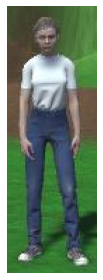

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread(test_image)
plt.figure(figsize=(4,4))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
def draw_keypoints(frame,keypoints,confidence_threshold): 
  x,y,c=frame.shape
  # shaped=np.squeeze(np.multiply(keypoints,[x,y,1])) #get all keypoints(x,y,z) of all joints(17 joints) from 1 frame

  # for kp in shaped:
  for kx,ky,kz in keypoints[:,0:3]:
    #  ky,kx,kp_conf=kp #put x,y,z of each joint into ky,kx,kp_conf
     cv2.circle(frame,(int(kx),int(ky)),1,(0,255,0), -1)
  # plt.imshow(frame)


In [ ]:
# [0nose,1neck,2lshoulder,3Lelbow,4Lwrist,5Rshoulder,6Relbow,7Rwrist,8Lhip,9Lknee,10Lfoot,11Rhip,12Rknee,13Rfoot,14Leye,15Reye,16Lear,17Rear]
joint=[0,1,2,3,4,None,1,5,6,7,None,1,8,9,10,None,1,11,12,13,None,17,15,0,14,16,None,8,11]

EDGE_COLORS = {

    (0, 1): 'm',
    (1, 2): 'c',
    (2, 3): 'm',
    (3, 4): 'c',
    (2, 5): 'm',
    (5,6): 'c',
    (6,7): 'm',
    (2, 8): 'c',
    (8,9): 'm',
    (9,10): 'c',
    (5,11): 'm',
    (11,12): 'c',
    (12,13): 'm',
    (17,15): 'c',
    (15,14): 'm',
    (14,16): 'c',
    (8,11):'m'
}
# //////////////

# joint=[0,1,2,3,4,None,2,5,6,7,None,2,8,9,10,None,5,11,12,13,None,17,15,14,16,None,8,11]
# joint={
#     0: 'm',
#     1: 'c',
#     2: 'm',
#     3: 'c',
#     4:'m',
#     'None':'None', 
#     2: 'c',
#     5: 'm',
#     6: 'c',
#     7:'m',
#     'None':'None',
#     2: 'c',
#     8: 'm',
#     9: 'c',
#     10:'m',
#     'None':'None',
#     5: 'c',
#     11: 'm',
#     12: 'c',
#     13:'m',
#     'None':'None',
#     17: 'c',
#     15: 'm',
#     14:'c',
#     16: 'm',
#     'None':'None',
#     8:'c',
#     11:'m'
#     }

In [ ]:
# function to draw connections
def draw_connections(frame,keypoints,edges,confidence_threshold):
   x,y,c=frame.shape
   shaped=np.squeeze(np.multiply(keypoints,[x,y,1])) #get all keypoints(x,y,z) of all joints(17 joints) from 1 frame

   for edge,color in EDGE_COLORS.items():
     p1,p2=edge
     y1,x1,c1=shaped[p1]#put x,y,z of each joint into y,x,c for first point to draw line
     y2,x2,c2=shaped[p2] #put x,y,z of each joint into y,x,c for second point to draw line
    
     if (c1>confidence_threshold) & (c2>confidence_threshold):
       cv2.line(frame,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0), 1)#draw connection between joints

**Detect Body

keypoints index : index = int(subset[n][i])

keypoints corrd : x,y = candidate[index][0:2]
** 

18
1
46.0 66.0 0.929111897945404
(191, 64, 3)
[[ 28.          24.           0.93935078]
 [ 29.          42.           0.9426946 ]
 [ 16.          42.           0.89045197]
 [ 13.          67.           0.90177387]
 [ 11.          91.           0.9456321 ]
 [ 42.          41.           0.89629102]
 [ 46.          66.           0.9291119 ]
 [ 48.          89.           0.96692789]
 [ 20.          85.           0.84337765]
 [ 18.         129.           0.84248716]
 [ 19.         168.           0.84898281]
 [ 38.          84.           0.8254391 ]
 [ 44.         131.           0.89095455]
 [ 46.         169.           0.87176681]
 [ 24.          21.           0.95826328]
 [ 31.          21.           0.97119004]
 [ 20.          23.           0.86658424]
 [ 36.          22.           0.85695064]]


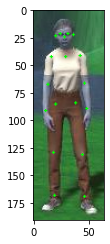

In [ ]:
# enable GPU for acceleration
oriImg = cv2.imread(test_image)
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)
print(len(candidate)) # number of keypoints
print(len(subset))    # number of persons


# print(candidate)
x,y,z = candidate[6][0:3]
print(x,y,z)

print(oriImg.shape)
print(candidate[:,0:3])
# cv2.circle(oriImg,(int(20.),int(23)),1,(0,255,0), -1)
draw_keypoints(oriImg,candidate[:,0:3],0.4)
draw_connections(oriImg,candidate[:,0:3],EDGE_COLORS,0.4)

plt.imshow(oriImg)


In [ ]:
from matplotlib.figure import projections
# fig=plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for x,y,z in candidate[:,0:3]:
# #  ax.scatter(x/46, y/48, z, marker='.')
#  cv2.circle(oriImg,(int(x),int(y)),1,(0,255,0), -1)
# plt.imshow(oriImg)
# # plt.show()


# # ////////////////////////////////draw line in 2d
# shaped=candidate[:,0:3]
# for edge,color in EDGE_COLORS.items():
#     p1,p2=edge
#     x1,y1,c1=shaped[p1]#put x,y,z of each joint into y,x,c for first point to draw line
#     x2,y2,c2=shaped[p2] #put x,y,z of each joint into y,x,c for second point to draw line
  
    
#     # if (c1>confidence_threshold) & (c2>confidence_threshold):
#     cv2.line(oriImg,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0), 1)

# plt.imshow(oriImg)

# /////////////////////draw line in 3d\\\\\\\\\\\\\\\\\\\\\\\\\\\\

#.............. normalize ......................
x_max=np.max(candidate[:,0])
y_max=np.max(candidate[:,1])

x_List=[]
y_List=[]
for xx in candidate[:,0]:
    x_List.append(xx/x_max)

for yy in candidate[:,1]:
    y_List.append(yy/y_max)


# ...............plot 3d lines.................
# x= candidate[:,0] #without Normalize
# y= candidate[:,1] #without Normalize
z= candidate[:,2]
# ...........plot 3d line by plotly---------
import plotly.express as px
import numpy as np 
import pandas as pd 

df = pd.DataFrame({"x": x_List, "y":y_List, "z":z})
fig = px.line_3d(df, x="x", y="y", z="z")
fig.show()

In [ ]:
# ...................ordering customize...................
# print(list(joint.keys()))
# print(joint)
x_plot=[]
y_plot=[]
z_plot=[]
for n in joint:
  # print(n)
  if n==None:
    x_plot.append(None)
    y_plot.append(None)
    z_plot.append(None)
  else:
   x_plot.append(x_List[n]) 
   y_plot.append(y_List[n])
   z_plot.append(z[n])
  #  x_plot.append(x[n]) #without Normalize
  #  y_plot.append(y[n]) #without Normalize



# print(x_plot)
# print(y_plot)
# print(z_plot)

import plotly.graph_objects as go
fig=go.Figure(go.Scatter3d(x=x_plot,#List of numbers
                          y=y_plot,
                          z=z_plot, 
                          mode='lines', 
                          line_width=2, 
                          line_color='blue'))

fig.update_layout(width=600, height=600)



In [ ]:
# detect hand
hands_list = util.handDetect(candidate, subset, oriImg)

all_hand_peaks = []
for x, y, w, is_left in hands_list:
    peaks = hand_estimation(oriImg[y:y+w, x:x+w, :])
    peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
    peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
    all_hand_peaks.append(peaks)

canvas = util.draw_handpose(canvas, all_hand_peaks)

**Display Result**

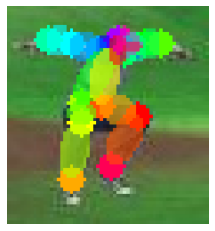

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()